In [94]:
# Packages

import numpy as np
import scipy
import scipy.spatial
from scipy.spatial import distance_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
# Variables

groups = 7

randomPointsInEveryGroup = 10
scatters = randomPointsInEveryGroup * 4

In [96]:
# Making random points

a1_x = np.random.uniform(9,12,randomPointsInEveryGroup)
a1_y = np.random.uniform(3,11,randomPointsInEveryGroup)
a2_x = np.random.uniform(1,6,randomPointsInEveryGroup)
a2_y = np.random.uniform(0,10,randomPointsInEveryGroup)
a3_x = np.random.uniform(5,9,randomPointsInEveryGroup)
a3_y = np.random.uniform(8,18,randomPointsInEveryGroup)

r4_x = np.random.uniform(0,12,randomPointsInEveryGroup)
r4_y = np.random.uniform(0,18,randomPointsInEveryGroup)

a_x = np.r_[a1_x, a2_x, a3_x, r4_x].reshape(-1,1)
a_y = np.r_[a1_y, a2_y, a3_y, r4_y].reshape(-1,1)

points = np.hstack((a_x, a_y))

In [97]:
# Get random points & distances

indexes = np.arange(scatters)
np.random.shuffle(indexes)
indexes = indexes[:groups]

distances = scipy.spatial.distance_matrix(points, points)

In [98]:
# Logic finding central points & lines

linkLines = np.array([])        
for x in range(scatters):
    i = indexes[np.argmin(distances[x][indexes])]
    linkLines = np.append(linkLines, np.r_[points[x], points[i]])
linkLines = linkLines.reshape(-1, 4)

centres = np.array([])
for i in indexes:
    group = linkLines[np.where(linkLines[:,2] == points[i][0])]
    centres = np.append(centres, group.mean(0))
centres = centres.reshape(-1,4)

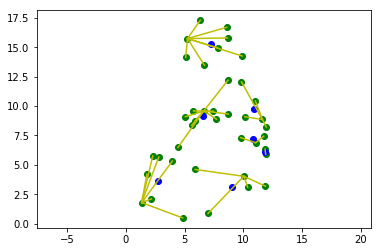

In [100]:
# Plotting task

plt.plot(a_x, a_y, 'go')
plt.plot(centres[:,0], centres[:,1], 'bo')

plt.plot(np.r_[linkLines[:,0], linkLines[:,2]].reshape(-1,scatters),
        np.r_[linkLines[:,1], linkLines[:,3]].reshape(-1,scatters), 'y-')

plt.axis('equal')
plt.show()

In [29]:
np.mean([1,3])

2.0